In [3]:
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

In [4]:
tf.__version__

'2.4.1'

In [5]:
import pandas as pd
import os
import numpy as np
import cv2
import PIL
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
data=[]
labels=[]


In [7]:
for filename in os.listdir("happy pp"):
    frame="happy pp/"+filename
    
    if frame=='happy pp/.DS_Store':
        pass
    else:
    #print(filename)
        i=Image.open("happy pp/"+filename)
        im=np.asarray(i)
        data.append(im)
        labels.append(filename+"_1")

In [8]:
for filename in os.listdir("scare pp"):
    frame="scare pp/"+filename
    
    if frame=='scare pp/.DS_Store':
        pass
    else:
    #print(filename)
        i=Image.open("scare pp/"+filename)
        im=np.asarray(i)
        data.append(im)
        labels.append(filename+"_2")

In [9]:
for filename in os.listdir("sad pp"):
    frame="sad pp/"+filename
    
    if frame=='sad pp/.DS_Store':
        pass
    else:
    #print(filename)
        i=Image.open("sad pp/"+filename)
        im=np.asarray(i)
        data.append(im)
        labels.append(filename+"_3")

In [10]:
for filename in os.listdir("angry pp"):
    frame="angry pp/"+filename
    
    if frame=='angry pp/.DS_Store':
        pass
    else:
    #print(filename)
        i=Image.open("angry pp/"+filename)
        im=np.asarray(i)
        data.append(im)
        labels.append(filename+"_4")

In [11]:
for filename in os.listdir("neutral pp"):
    frame="neutral pp/"+filename
    
    if frame=='neutral pp/.DS_Store':
        pass
    else:
    #print(filename)
        i=Image.open("neutral pp/"+filename)
        im=np.asarray(i)
        data.append(im)
        labels.append(filename+"_5")

In [12]:
data=np.asarray(data)

In [13]:
data=data[:,:,:,-1]

In [14]:
emotion=[]
for i in range(len(labels)):
    emotion.append(labels[i][-1])

In [15]:
lis=[]
for i in range(len(data)):
    d=data[i].flatten()
    lis.append(d)
    

In [16]:
df = pd.DataFrame(list(zip(lis, emotion)), 
               columns =['Image', 'Label'])

In [17]:
from sklearn.utils import shuffle
df = shuffle(df)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
trainx,testx,trainy,testy=train_test_split(df["Image"], df["Label"], train_size=0.8,test_size=0.2)

In [20]:
trainx=np.asarray(trainx)

In [21]:
traindata=[]
for i in range (len(trainx)):
    trx=trainx[i].reshape((64,64))
    traindata.append(trx)

In [22]:
traindata=np.asarray(traindata)

In [23]:
traindata.shape

(4346, 64, 64)

In [24]:
traindata=traindata.reshape(len(traindata),64,64,1)

In [25]:
trainy=trainy.astype("uint8")

In [26]:
trainy=np.asarray(trainy)

In [27]:
type(trainy)

numpy.ndarray

In [29]:
trainy

array([3, 2, 4, ..., 3, 3, 4], dtype=uint8)

In [30]:
!pip install keras

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.


In [31]:
import keras

In [45]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(64,64,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.BatchNormalization(),
    keras.layers.Activation(activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(rate=0.2),
      
      
    keras.layers.Conv2D(
        filters=hp.Int('conv_3_filter', min_value=64, max_value=256, step=16),
        kernel_size=hp.Choice('conv_3_kernel', values = [3,5]),
        activation='relu'
    ),
      
    keras.layers.Conv2D(
        filters=hp.Int('conv_4_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_4_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.BatchNormalization(),
    keras.layers.Activation(activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(rate=0.2),
      
    
    keras.layers.Conv2D(
        filters=hp.Int('conv_5_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_5_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_6_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_6_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.BatchNormalization(),
    keras.layers.Activation(activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(rate=0.2),
    
    
      
      
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(6, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [46]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [47]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=20,directory='output',project_name="ProjectHP")

In [48]:
tuner_search.search(traindata,trainy,epochs=3,validation_split=0.1)

Trial 20 Complete [00h 05m 04s]
val_accuracy: 0.2896551787853241

Best val_accuracy So Far: 0.3977011442184448
Total elapsed time: 02h 28m 12s
INFO:tensorflow:Oracle triggered exit


In [49]:
model=tuner_search.get_best_models(num_models=1)[0]

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 58, 48)        76848     
_________________________________________________________________
batch_normalization (BatchNo (None, 58, 58, 48)        192       
_________________________________________________________________
activation (Activation)      (None, 58, 58, 48)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 48)        0         
_________________________________________________________________
dropout (Dropout)            (None, 29, 29, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 144)       6

In [51]:
model.fit(traindata, trainy, epochs=40, validation_split=0.1, initial_epoch=3)

Epoch 4/40
123/123 [==============================] - 110s 886ms/step - loss: 1.3320 - accuracy: 0.4497 - val_loss: 1.4646 - val_accuracy: 0.3885
Epoch 5/40
123/123 [==============================] - 104s 846ms/step - loss: 1.2561 - accuracy: 0.5089 - val_loss: 1.6355 - val_accuracy: 0.2621
Epoch 6/40
123/123 [==============================] - 104s 847ms/step - loss: 1.2130 - accuracy: 0.5203 - val_loss: 1.3990 - val_accuracy: 0.4138
Epoch 7/40
123/123 [==============================] - 105s 854ms/step - loss: 1.1609 - accuracy: 0.5520 - val_loss: 1.2738 - val_accuracy: 0.5034
Epoch 8/40
123/123 [==============================] - 105s 851ms/step - loss: 1.0960 - accuracy: 0.5596 - val_loss: 1.7637 - val_accuracy: 0.3494
Epoch 9/40
123/123 [==============================] - 106s 860ms/step - loss: 1.0467 - accuracy: 0.5882 - val_loss: 1.3091 - val_accuracy: 0.4966
Epoch 10/40
123/123 [==============================] - 88s 713ms/step - loss: 1.0207 - accuracy: 0.6009 - val_loss: 1.2895 -

In [52]:
model.save("final_model.h5")

# Testing the model

In [32]:
from keras.models import load_model

In [33]:
model = load_model('final_model.h5')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 58, 48)        76848     
_________________________________________________________________
batch_normalization (BatchNo (None, 58, 58, 48)        192       
_________________________________________________________________
activation (Activation)      (None, 58, 58, 48)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 48)        0         
_________________________________________________________________
dropout (Dropout)            (None, 29, 29, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 144)       6

In [35]:
type(traindata)

numpy.ndarray

In [36]:
type(trainy)

numpy.ndarray

In [37]:
type(testx)

pandas.core.series.Series

In [38]:
type(testy)

pandas.core.series.Series

In [39]:
testx=np.asarray(testx)

In [40]:
testdata=[]
for i in range(len(testx)):
    ttx=testx[i].reshape((64,64))
    testdata.append(ttx)

In [41]:
testdata=np.asarray(testdata)

In [42]:
testdata=testdata.reshape(len(testdata),64,64,1)

In [43]:
testy=testy.astype("uint8")

In [44]:
testy=np.asarray(testy)

In [45]:
type(testy)

numpy.ndarray

In [46]:
testy

array([2, 2, 2, ..., 3, 2, 4], dtype=uint8)

In [47]:
testdata.shape

(1087, 64, 64, 1)

In [48]:
score = model.evaluate(testdata, testy, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])


Test loss: 0.5035753846168518
Test accuracy: 0.8767249584197998


In [57]:
p=model.predict(testdata)

In [59]:
p[0]

array([4.415418e-17, 4.269471e-08, 9.539825e-07, 9.999808e-01,
       1.753474e-05, 7.051959e-07], dtype=float32)

In [62]:
pred = np.argmax(p[0])

In [63]:
pred

3

In [65]:
testy[0]

3

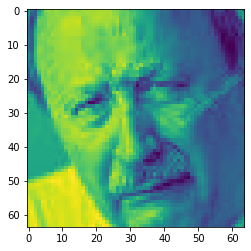

In [67]:
plt.imshow(testdata[0].reshape(64,64))

# Menu driven 

In [49]:
from PIL import ImageOps
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [70]:

inp=input("Choose 1 for webcam and 2 for image import")

if inp==2:
        frame=input("Enter image path: ")
        i=Image.open(frame)
        im2 = ImageOps.grayscale(i) 
        faces=face_cascade.detectMultiScale(np.array(im2),1.3,5)
        if len(faces)!=0:
            
            (x,y,w,h)=faces[0]
            crop=np.array(im2)[y:y+h, x:x+w]
            s=cv2.resize(crop, (64, 64), interpolation=cv2.INTER_LINEAR)
            norm_img = np.zeros((300, 300))
            norm_img = cv2.normalize(s, norm_img, 0, 255, cv2.NORM_MINMAX)
            #PIL_image = Image.fromarray(np.uint8(norm_img)).convert('RGB')
            PIL_image=np.asarray(norm_img)
            #PIL_image=PIL_image[:,:,1]
            #PIL_image.save("out.jpg")
            #plt.imshow(PIL_image)
            #print(PIL_image.shape)
            #model.predict(PIL_image)
            PIL_image=PIL_image.reshape(1,64,64,1)
            pre=model.predict(PIL_image)
            o=np.argmax(pre)
            print(o)
        else:
            print("Face not detected. Try again with another image (clearly visible at appropriate distance)")
else:
    key = cv2. waitKey(1)
    webcam = cv2.VideoCapture(0)
    while True:
        try:
            check, frame = webcam.read()
            print(check) #prints true as long as the webcam is running
            print(frame) #prints matrix values of each framecd 
            cv2.imshow("Capturing", frame)
            key = cv2.waitKey(1)
            if key == ord('s'): 
                cv2.imwrite(filename='saved_img.jpg', img=frame)
                webcam.release()
                img_new = cv2.imread('saved_img.jpg', cv2.IMREAD_GRAYSCALE)
                img_new = cv2.imshow("Captured Image", img_new)
                cv2.waitKey(1650)
                cv2.destroyAllWindows()
                print("Processing image...")
                img_ = cv2.imread('saved_img.jpg', cv2.IMREAD_ANYCOLOR)
                print("Converting RGB image to grayscale...")
                gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
                print("Converted RGB image to grayscale...")
                print("Resizing image to 64x64 scale...")
                img_ = cv2.resize(gray,(64,64))
                print("Resized...")
                img_resized = cv2.imwrite(filename='saved_img.jpg', img=img_)
                print("Image saved!")

                break
            elif key == ord('q'):
                print("Turning off camera.")
                webcam.release()
                print("Camera off.")
                print("Program ended.")
                cv2.destroyAllWindows()
                break

        except(KeyboardInterrupt):
            print("Turning off camera.")
            webcam.release()
            print("Camera off.")
            print("Program ended.")
            cv2.destroyAllWindows()
            break

            frame= "saved_img.jpg"
            i=Image.open(frame)
            im2 = ImageOps.grayscale(i) 
            faces=face_cascade.detectMultiScale(np.array(im2),1.3,5)
            if len(faces)!=0:

                (x,y,w,h)=faces[0]
                crop=np.array(im2)[y:y+h, x:x+w]
                s=cv2.resize(crop, (64, 64), interpolation=cv2.INTER_LINEAR)
                norm_img = np.zeros((300, 300))
                norm_img = cv2.normalize(s, norm_img, 0, 255, cv2.NORM_MINMAX)
                #PIL_image = Image.fromarray(np.uint8(norm_img)).convert('RGB')
                PIL_image=np.asarray(norm_img)
                #PIL_image=PIL_image[:,:,1]
                #PIL_image.save("out.jpg")
                #plt.imshow(PIL_image)
                #print(PIL_image.shape)
                #model.predict(PIL_image)
                PIL_image=PIL_image.reshape(1,64,64,1)
                pre=model.predict(PIL_image)
                o=np.argmax(pre)
                print(o)




Choose 1 for webcam and 2 for image import2


In [88]:
frame=input("Enter image path")
i=Image.open(frame)
#grayscale
im2 = ImageOps.grayscale(i) 
faces=face_cascade.detectMultiScale(np.array(im2),1.3,5)
(x,y,w,h)=faces[0]
crop=np.array(im2)[y:y+h, x:x+w]
s=cv2.resize(crop, (64, 64), interpolation=cv2.INTER_LINEAR)
norm_img = np.zeros((300, 300))
norm_img = cv2.normalize(s, norm_img, 0, 255, cv2.NORM_MINMAX)
#PIL_image = Image.fromarray(np.uint8(norm_img)).convert('RGB')
PIL_image=np.asarray(PIL_image)
PIL_image=PIL_image.reshape(64,64,1)
print(PIL_image.shape)
plt.imshow(PIL_image)
print(type(PIL_image))
#model.predict(PIL_image)

Enter image pathdemo.jpg


ValueError: cannot reshape array of size 12288 into shape (64,64,1)

In [77]:
type(PIL_image)

PIL.Image.Image

In [57]:
        frame=input("Enter image path: ")
        i=Image.open(frame)
        im2 = ImageOps.grayscale(i) 
        faces=face_cascade.detectMultiScale(np.array(im2),1.3,5)
        if len(faces)!=0:
            
            (x,y,w,h)=faces[0]
            crop=np.array(im2)[y:y+h, x:x+w]
            s=cv2.resize(crop, (64, 64), interpolation=cv2.INTER_LINEAR)
            norm_img = np.zeros((300, 300))
            norm_img = cv2.normalize(s, norm_img, 0, 255, cv2.NORM_MINMAX)
            #PIL_image = Image.fromarray(np.uint8(norm_img)).convert('RGB')
            PIL_image=np.asarray(norm_img)
            #PIL_image=PIL_image[:,:,1]
            #PIL_image.save("out.jpg")
            #plt.imshow(PIL_image)
            #print(PIL_image.shape)
            #model.predict(PIL_image)
            PIL_image=PIL_image.reshape(1,64,64,1)
            pre=model.predict(PIL_image)
            o=np.argmax(pre)
            print(o)
        else:
            print("Face not detected. Try again with anotheer image (clearly visible at appropriate distance)")

Enter image path: xyz.jpg
1


In [ ]:
import cv2 

key = cv2. waitKey(1)
webcam = cv2.VideoCapture(0)
while True:
    try:
        check, frame = webcam.read()
        print(check) #prints true as long as the webcam is running
        print(frame) #prints matrix values of each framecd 
        cv2.imshow("Capturing", frame)
        key = cv2.waitKey(1)
        if key == ord('s'): 
            cv2.imwrite(filename='saved_img.jpg', img=frame)
            webcam.release()
            img_new = cv2.imread('saved_img.jpg', cv2.IMREAD_GRAYSCALE)
            img_new = cv2.imshow("Captured Image", img_new)
            cv2.waitKey(1650)
            cv2.destroyAllWindows()
            print("Processing image...")
            img_ = cv2.imread('saved_img.jpg', cv2.IMREAD_ANYCOLOR)
            print("Converting RGB image to grayscale...")
            gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
            print("Converted RGB image to grayscale...")
            print("Resizing image to 64x64 scale...")
            img_ = cv2.resize(gray,(64,64))
            print("Resized...")
            img_resized = cv2.imwrite(filename='saved_img.jpg', img=img_)
            print("Image saved!")
        
            break
        elif key == ord('q'):
            print("Turning off camera.")
            webcam.release()
            print("Camera off.")
            print("Program ended.")
            cv2.destroyAllWindows()
            break
        
    except(KeyboardInterrupt):
        print("Turning off camera.")
        webcam.release()
        print("Camera off.")
        print("Program ended.")
        cv2.destroyAllWindows()
        break
        
        frame= "saved_img.jpg"
        i=Image.open(frame)
        im2 = ImageOps.grayscale(i) 
        faces=face_cascade.detectMultiScale(np.array(im2),1.3,5)
        if len(faces)!=0:
            
            (x,y,w,h)=faces[0]
            crop=np.array(im2)[y:y+h, x:x+w]
            s=cv2.resize(crop, (64, 64), interpolation=cv2.INTER_LINEAR)
            norm_img = np.zeros((300, 300))
            norm_img = cv2.normalize(s, norm_img, 0, 255, cv2.NORM_MINMAX)
            #PIL_image = Image.fromarray(np.uint8(norm_img)).convert('RGB')
            PIL_image=np.asarray(norm_img)
            #PIL_image=PIL_image[:,:,1]
            #PIL_image.save("out.jpg")
            #plt.imshow(PIL_image)
            #print(PIL_image.shape)
            #model.predict(PIL_image)
            PIL_image=PIL_image.reshape(1,64,64,1)
            pre=model.predict(PIL_image)
            o=np.argmax(pre)
            print(o)
        

    


True
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [7 0 0]
  [9 0 0]
  [8 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [3 0 0]
  [7 0 0]
  [5 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [6 0 0]
  [6 0 0]
  [4 0 0]]]


In [ ]:
import cv2
video_capture = cv2.VideoCapture(0)

cv2.namedWindow("Window")

while True:
    ret, frame = video_capture.read()
    cv2.imshow("Window", frame)

    #This breaks on 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()